# BUSINESS CASE : PRICE AND COST ESCENARIOS

In [254]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Defining variables and constants

First im going to calculate all the structure of the company, stablishing prices, benefits and costs, all this is going to be visualized in some plots

In [255]:
# price of the standard can fish (filete de caballa lydemar)
prices = np.array([2.5 , 3 , 3.5]) 

# costos
box_cost = 110
cans_per_box = 48
can_cost = box_cost / cans_per_box

# cans ordered per person 
number_cans = np.array([6 , 12 , 24 , 48])

# defining business functions
# benefit function includes different scenarios for prices and number_cans
def benefit(x , y , z):
    return ( (prices[y] - can_cost) * number_cans[z] ) * x



number_clients = np.arange(prices[0], 100 , 10)

## Creating graph models

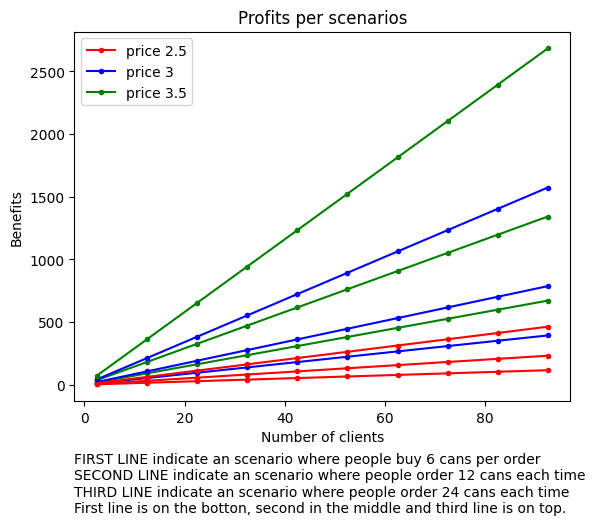

In [256]:

# now that we have the tree scenarios, we can plot tree lines depending if the price is low, medium or high
# 6 cans per order
plt.plot(number_clients, benefit(number_clients , 0 , 0) , marker="." , color = 'red' , label = 'price 2.5' )
plt.plot(number_clients, benefit(number_clients , 1 , 0) , marker="." , color = 'blue' , label = 'price 3'  )
plt.plot(number_clients, benefit(number_clients , 2 , 0) , marker="." , color = 'green', label = 'price 3.5'  )

# 12 cans per order
plt.plot(number_clients, benefit(number_clients , 0 , 1) , marker="." , color = 'red'  )
plt.plot(number_clients, benefit(number_clients , 1 , 1) , marker="." , color = 'blue' )
plt.plot(number_clients, benefit(number_clients , 2 , 1) , marker="." , color = 'green' )

# 24 cans per order
plt.plot(number_clients, benefit(number_clients , 0 , 2) , marker="." , color = 'red'  )
plt.plot(number_clients, benefit(number_clients , 1 , 2) , marker="." , color = 'blue' )
plt.plot(number_clients, benefit(number_clients , 2 , 2) , marker="." , color = 'green' )


plt.xlabel("Number of clients")
plt.ylabel("Benefits")
plt.title("Profits per scenarios")
plt.legend()
plt.annotate('FIRST LINE indicate an scenario where people buy 6 cans per order' +
             '\nSECOND LINE indicate an scenario where people order 12 cans each time' +
             '\nTHIRD LINE indicate an scenario where people order 24 cans each time' + 
             '\nFirst line is on the botton, second in the middle and third line is on top.', xy = (0, -0.3), xycoords='axes fraction')
plt.show()

Entonces tenemos varios supuestos, uno optimista con el *precio de 3.5 por lata*, con un *costo fijo por caja de 110 soles* y que en promedio, cada *cliente nos compre 24 latas*,
esto nos daría con *100 ordenes/compras por mes*, una *utilidad neta mensual de 2900 soles*. Con 100 ordenes tenemos 25 ordenes que repartir por semana, lo cual es en realidad un número bajo y facil de manejar.